# Lab 4: Logisitic Regression


## Import and Inspect Data

In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

heartData = pd.read_csv("D:\Programming\Python_code\PrinciplesOfDS_Course\Labs\Data\heart.csv")
print(heartData.info()) # all data types int or float, no non-numeric features. No categorical features to convert 

print(heartData.head())

# Option setup: 
pd.set_option("display.max_rows", 1500)
pd.set_option("display.expand_frame_repr", True)
pd.set_option('display.width', 1000)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1        0      150      0      2.3      0   0     1       1
1   37    1   2       

<AxesSubplot: >

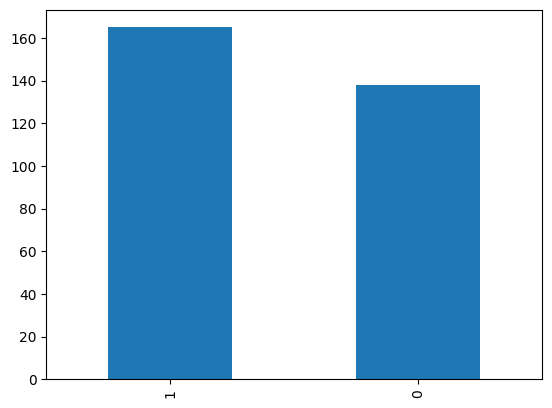

In [8]:
# Check for missing values 
heartData.isna().sum()/heartData.shape[0] # all values 0. No missing values. 

# Visual inspection of target variable
heartData.target.value_counts().plot(kind = 'bar') 
# Data is balanced with no significant dominance of samples by either of two categories. 
# balanced data means an accuracy measure is appropriate. 

## Split and Normalize Data


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from random import shuffle
import random

X, y = heartData.drop(columns='target'), heartData.target

# Subtle but important step for this cross-validation workflow: Convert y to ndarry
y = y.to_numpy() ##########################

# samples should be divided for same size folds, at 10 folds we need a value divisible by 10 
X.shape[0] # 303 observations

260/303 # 0.858085808580858 ; 85% of data for trainig and ~15% for testing is a good split ratio 

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size= 0.14, random_state=2)

print(X_train_val.shape) # correct split value achieved 
print(y_train_val.shape)

normalizer = StandardScaler()
X_train_val = normalizer.fit_transform(X_train_val)
X_test = normalizer.transform(X_test)

(260, 13)
(260,)


In [10]:
# 10 fold cross-validation
folds = 10

# total number of training samples
num_train_val = X_train_val.shape[0]

#shuffleing indices of samples to remove potential ordering bias
sample_idx = np.arange(num_train_val)
shuffle(sample_idx)

print(sample_idx.shape)

# splitting indices into 10 folds
folds_idx = sample_idx.reshape(folds, -1)
print('index of folds\n', folds_idx)

# set of hyperparameters to be tested
regTerms = [.00001, .0001, .001, .01, .1, 1, 10, 20, 50, 100]

best_acc = 0.0
best_reg = 0.0
best_f1 = 0.0
best_precision = 0.0
best_recall = 0.0

for reg in regTerms:
    
    # 10-fold cross-validation
    sum_acc = 0.0
    sum_f1 = 0.0
    sum_precision = 0.0
    sum_recall = 0.0
    
    for fold in range(folds):
        
        index_of_folds_temp = folds_idx.copy()
        
        valid_index = index_of_folds_temp[fold,:].reshape(-1) #get the index of the validation set
        train_index = np.delete(index_of_folds_temp, fold, 0).reshape(-1) #get the index of the training set
      
        # training set
        X_train = X_train_val[train_index]
        y_train = y_train_val[train_index]
        
        # validation set
        X_valid = X_train_val[valid_index]
        y_valid = y_train_val[valid_index]
                
        # build the model with different hyperparameters
        clf = LogisticRegression(penalty='l2', C=reg, solver='lbfgs')
        
        #train the model with the training set
        clf.fit(X_train, y_train)
        
        y_valid_pred = clf.predict(X_valid)
        acc = accuracy_score(y_valid, y_valid_pred)
        f1 = f1_score(y_valid, y_valid_pred)
        precision = precision_score(y_valid, y_valid_pred)
        recall = recall_score(y_valid, y_valid_pred)
        
        sum_acc += acc
        sum_f1 += f1
        sum_precision += precision 
        sum_recall += recall
    
    cur_acc = sum_acc / folds
    cur_f1 = sum_f1 / folds
    cur_precision = sum_precision / folds
    cur_recall = sum_recall / folds
    
    print("reg_coeff: {}, acc: {:.3f}".format(1.0/reg, cur_acc))
    
    # store the best hyperparameter
    if cur_acc > best_acc:
        best_acc = cur_acc
        best_reg = reg
        
    # storing best of each metric to see if they're associated with different regularization terms 
    if cur_f1 > best_f1:
        best_f1 = cur_f1
        best_f1_reg = reg
    if cur_precision > best_precision:
        best_precision = cur_precision
        best_precision_reg = reg
    if cur_recall > best_recall:
        best_recall = cur_recall
        best_recall_reg = reg

        
print('best_acc', best_acc, 'best_reg', best_reg)
print("best_f1 and f1 reg:", best_f1, best_f1_reg)
print("best_precision and precision reg:", best_precision, best_precision_reg)
print("best_recall and recall reg:", best_recall, best_recall_reg)

(260,)
index of folds
 [[ 48 155  36 251  52 160 152 203  44 233 254  12  56 144 130 191 135  80
  168  78 100 171 117   0 170 229]
 [192 201  30 179 163  49 252  19 213   3 230 158  65 124 187 143 188  58
  219   4 245  18 142 216  73 101]
 [161 126  98 221  89 199 180  68  25  34 190 162  11 129 153  32 259 107
   47 116 200 131 110  79  67 234]
 [258  16   2 103 154 140  82 225  20  88  61 220 114 202  27 166 149  63
   54  87 227 195 145  45   6 253]
 [  8 123  37  14  41 238 151  76 167  77 194 104  59 240 177  60  66   7
  211  46 137 164 205  74  28 257]
 [  1 119 183 118 156  39  51  23 136  75 185  15  57 237 218  86  13 106
  169 222 102 128 146 210  50 198]
 [ 62  91 255 209 157 241 232  26  35 108 196 236  83  99  95 182  53 214
  133 239 204 122  69  17 181 228]
 [148 134 175 207  22 226 111 247 147  43  38 193 186 250  64 109  72   5
  115 243  92 138 208 178 244 174]
 [172  85 113   9  10 197 121 249 215 212  24 112 120  21 132  33  84 231
  176 127 248 139 246  55 256 2

## Retraining with best regulization coefficient

The best regularization coefficient is not clear, after running the cross validation 10+ times I see variable outcomes, either '.1', '1', or '10' are presented as the best regularization coefficient, with none of them dominating. Sometimes there is a preferred regularization coefficient for the different evaluation metetrics, but most often they all agree on the same reg. Excluding recall, which always has a best recall of 1.0 for the reg term '1e-5'.

In [11]:
# training model of full training data with best regularization term 
clf = LogisticRegression(penalty='l2', C=best_reg, solver='lbfgs')    
clf.fit(X_train_val, y_train_val)

y_prediction = clf.predict(X_test)
acc = accuracy_score(y_test, y_prediction)
f1 = f1_score(y_test, y_prediction)
recall = recall_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction)

print("accuracy: {:.3f}, recall: {:.3f}, precision: {:.3f}, f1: {:.3f},".format(acc, recall, precision, f1))

accuracy: 0.907, recall: 1.000, precision: 0.826, f1: 0.905,


## Visualize the model parameter vector


[-0.00282911 -0.86855305  0.90496892 -0.33131112 -0.26797972 -0.05962608
  0.28811924  0.55217471 -0.35821439 -0.53428963  0.46237511 -0.71252503
 -0.55457973]
['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal' 'target']


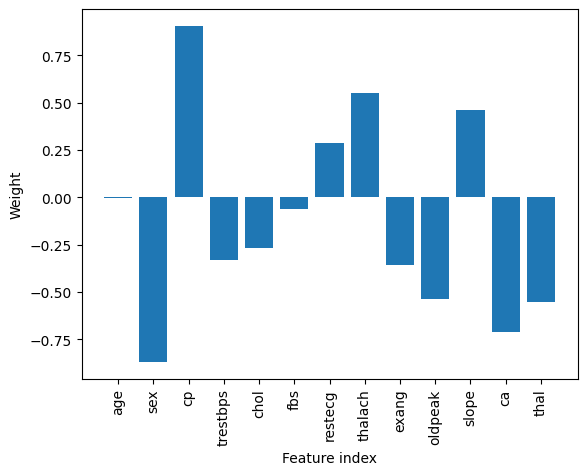

In [12]:
# grab the coefficient vector (parameters)
weights = clf.coef_[0]
print(weights)

print(heartData.columns.values)
col_names = heartData.columns.values[:13, ] # subsetting out the target variable as no weight exists for it 

#generating bar plot 
plt.bar(range(len(weights)), weights)
plt.xlabel('Feature index')
plt.ylabel('Weight')
plt.xticks(range(len(weights)), col_names, rotation=90) #labeling x-axis with corresponding features
plt.show()

## Discussion 

The features which correlate to high absolute values in their weights such as sex, and cp, are likely showing larger weights because they have a strong correlation with the target variable. In other words, they offer more insight about the target variable and thus have their signals amplified within the model. This means they are being weighted more heavily, and are thus more powerful in producing good predictions according to the model. 